<a href="https://colab.research.google.com/github/AryanAg1310/Nlp-ProjectRd1/blob/main/NLP_Rd1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Book Link
https://drive.google.com/file/d/1sXM_dDlH8-C_6jlc9va94eIUGQPvL4uh/view?usp=drive_link

## Importing Necessary Libraries and Downloading Packages

In [ ]:
# !pip install wordcloud

import nltk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import random as rnd
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from collections import defaultdict,Counter
from nltk.util import ngrams

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Creating a function for data preprocessing using regular expressions

In [ ]:
def text_preprocessing(raw):
    # lower case
    raw = raw.lower()
    # remove numbers
    raw = re.sub(r'\d+', '', raw)
    # remove punctuation
    raw = re.sub(r'[^\w\s]', '', raw)
    # white space removal
    raw = raw.strip()
    #removing any non alphanumeric characters
    raw = re.sub('\W', ' ', raw)
    #removing extra white spaces
    raw = re.sub('\s+', ' ', raw)
    #removing chapter numbers and running sections
    raw = re.sub('chapter \w*', '', raw)
    return (raw)

## Importing  text

In [ ]:
novel=open("harry-potter-sorcerers-stone.txt",encoding="utf-8")
raw_text=novel.read()
raw_text

"\x0c\x0c        HP 1 - Harry Potter and the\n            Sorcerer's Stone\nHarry Potter and the Sorcerer's Stone\n\n\nHarry Potter\n&\nThe Sorcerer’s Stone\n\n\nby J.K. Rowling\n\x0cHP 1 - Harry Potter and the\n    Sorcerer's Stone\n\x0c                            CHAPTER ONE\n\n   THE BOY WHO LIVED\n\n          M r. and Mrs. Dursley, of number four, Privet Drive, were proud to say\nthat they were perfectly normal, thank you very much. They were the last people\nyou’d expect to be involved in anything strange or mysterious, because they just\ndidn’t hold with such nonsense.\n           Mr. Dursley was the director of a firm called Grunnings, which made\ndrills. He was a big, beefy man with hardly any neck, although he did have a\nvery large mustache. Mrs. Dursley was thin and blonde and had nearly twice the\nusual amount of neck, which came in very useful as she spent so much of her\ntime craning over garden fences, spying on the neighbors. The Dursleys had a\nsmall son called Dudley 

## Applying  preprocessing function

In [ ]:
T=text_preprocessing(raw_text)
T

'hp harry potter and the sorcerers stone harry potter and the sorcerers stone harry potter the sorcerers stone by jk rowling hp harry potter and the sorcerers stone  the boy who lived m r and mrs dursley of number four privet drive were proud to say that they were perfectly normal thank you very much they were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense mr dursley was the director of a firm called grunnings which made drills he was a big beefy man with hardly any neck although he did have a very large mustache mrs dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors the dursleys had a small son called dudley and in their opinion there was no finer boy anywhere the dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would disc

## Removing Stopwords and Tokenizing the text

In [ ]:
def stopwords_text(text):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = word_tokenize(text)
    result = [i for i in tokens if not i in stop_words]
    return result

In [ ]:
text_without_stopwords=stopwords_text(T)
text_without_stopwords

['hp',
 'harry',
 'potter',
 'sorcerers',
 'stone',
 'harry',
 'potter',
 'sorcerers',
 'stone',
 'harry',
 'potter',
 'sorcerers',
 'stone',
 'jk',
 'rowling',
 'hp',
 'harry',
 'potter',
 'sorcerers',
 'stone',
 'boy',
 'lived',
 'r',
 'mrs',
 'dursley',
 'number',
 'four',
 'privet',
 'drive',
 'proud',
 'say',
 'perfectly',
 'normal',
 'thank',
 'much',
 'last',
 'people',
 'youd',
 'expect',
 'involved',
 'anything',
 'strange',
 'mysterious',
 'didnt',
 'hold',
 'nonsense',
 'mr',
 'dursley',
 'director',
 'firm',
 'called',
 'grunnings',
 'made',
 'drills',
 'big',
 'beefy',
 'man',
 'hardly',
 'neck',
 'although',
 'large',
 'mustache',
 'mrs',
 'dursley',
 'thin',
 'blonde',
 'nearly',
 'twice',
 'usual',
 'amount',
 'neck',
 'came',
 'useful',
 'spent',
 'much',
 'time',
 'craning',
 'garden',
 'fences',
 'spying',
 'neighbors',
 'dursleys',
 'small',
 'son',
 'called',
 'dudley',
 'opinion',
 'finer',
 'boy',
 'anywhere',
 'dursleys',
 'everything',
 'wanted',
 'also',
 'sec

## Function to calculate frequency of the tokens

In [ ]:
def freq(tokens):
# frequency of tokens
    freq = {}
    for t in tokens:
        if t in freq:
            freq[t]+=1
        else:
            freq[t]=1
    return freq

## Tokens Mapped to their Frequencies

In [ ]:
frequency_table=freq(text_without_stopwords)
frequency_table

{'hp': 18,
 'harry': 1230,
 'potter': 111,
 'sorcerers': 35,
 'stone': 94,
 'jk': 1,
 'rowling': 1,
 'boy': 82,
 'lived': 9,
 'r': 1,
 'mrs': 46,
 'dursley': 54,
 'number': 17,
 'four': 30,
 'privet': 16,
 'drive': 20,
 'proud': 7,
 'say': 75,
 'perfectly': 5,
 'normal': 10,
 'thank': 8,
 'much': 76,
 'last': 82,
 'people': 92,
 'youd': 22,
 'expect': 13,
 'involved': 5,
 'anything': 74,
 'strange': 22,
 'mysterious': 6,
 'didnt': 195,
 'hold': 12,
 'nonsense': 4,
 'mr': 80,
 'director': 2,
 'firm': 2,
 'called': 44,
 'grunnings': 2,
 'made': 66,
 'drills': 6,
 'big': 28,
 'beefy': 1,
 'man': 33,
 'hardly': 22,
 'neck': 18,
 'although': 11,
 'large': 51,
 'mustache': 6,
 'thin': 10,
 'blonde': 2,
 'nearly': 36,
 'twice': 15,
 'usual': 18,
 'amount': 1,
 'came': 75,
 'useful': 6,
 'spent': 11,
 'time': 119,
 'craning': 2,
 'garden': 6,
 'fences': 1,
 'spying': 3,
 'neighbors': 3,
 'dursleys': 52,
 'small': 32,
 'son': 9,
 'dudley': 116,
 'opinion': 5,
 'finer': 2,
 'anywhere': 7,
 'ever

## Function to make frequency graph

In [ ]:
def freq_graph(tokens):
#frequency graph
    FreqDist(tokens)
    all_fdist = FreqDist(tokens).most_common(60)

    all_fdist = pd.Series(dict(all_fdist))

    fig, ax = plt.subplots(figsize=(10,10))

    all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
    plt.xticks(rotation=90)

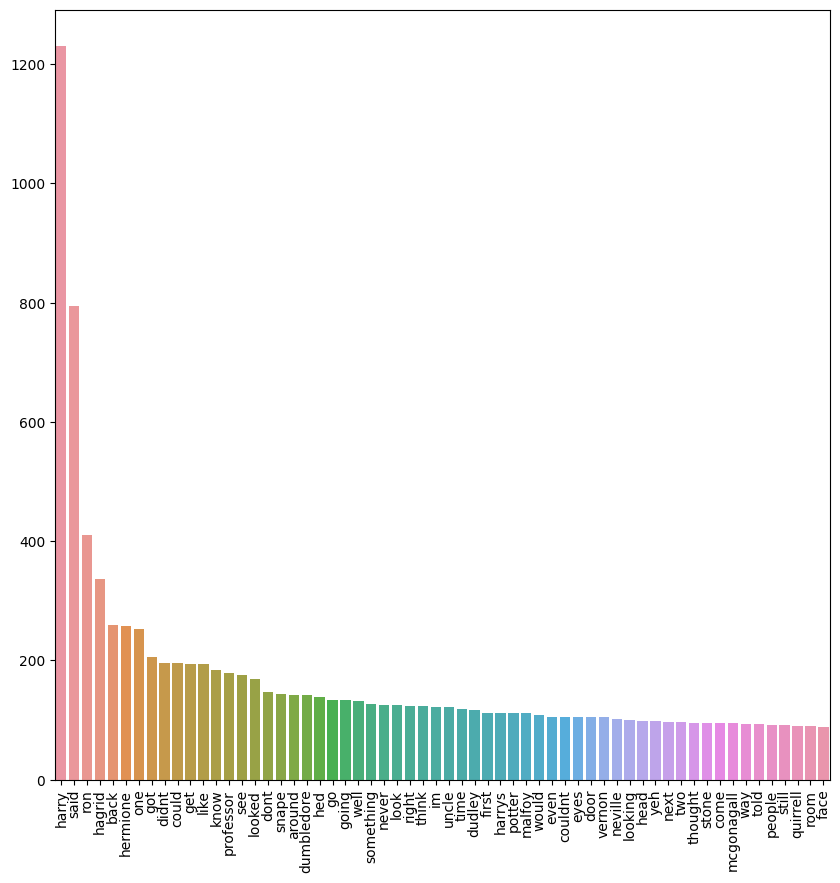

In [ ]:
freq_graph(text_without_stopwords)

## Creating WordCloud

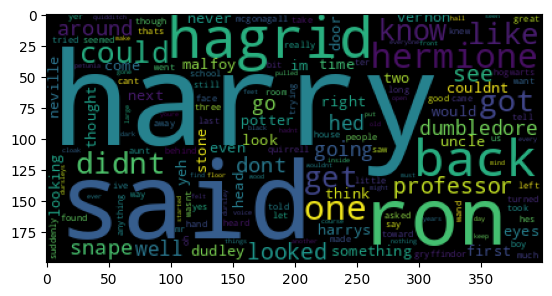

<Figure size 2000x3500 with 0 Axes>

In [ ]:
cloud=WordCloud()
wordCloud=cloud.generate_from_frequencies(frequency_table)
plt.imshow(wordCloud)
plt.figure(figsize=(20,35))
plt.show()

##POS Tagging text without stopwords

In [ ]:
posTagged_text=nltk.pos_tag(text_without_stopwords)
posTagged_text

[('hp', 'NN'),
 ('harry', 'NN'),
 ('potter', 'NN'),
 ('sorcerers', 'NNS'),
 ('stone', 'VBP'),
 ('harry', 'JJ'),
 ('potter', 'NN'),
 ('sorcerers', 'NNS'),
 ('stone', 'VBP'),
 ('harry', 'JJ'),
 ('potter', 'NN'),
 ('sorcerers', 'NNS'),
 ('stone', 'VBP'),
 ('jk', 'NN'),
 ('rowling', 'VBG'),
 ('hp', 'NN'),
 ('harry', 'NN'),
 ('potter', 'NN'),
 ('sorcerers', 'NNS'),
 ('stone', 'VBP'),
 ('boy', 'NN'),
 ('lived', 'VBD'),
 ('r', 'JJ'),
 ('mrs', 'NN'),
 ('dursley', 'NN'),
 ('number', 'NN'),
 ('four', 'CD'),
 ('privet', 'NN'),
 ('drive', 'NN'),
 ('proud', 'NNS'),
 ('say', 'VBP'),
 ('perfectly', 'RB'),
 ('normal', 'JJ'),
 ('thank', 'NN'),
 ('much', 'JJ'),
 ('last', 'JJ'),
 ('people', 'NNS'),
 ('youd', 'VBP'),
 ('expect', 'VBP'),
 ('involved', 'VBN'),
 ('anything', 'NN'),
 ('strange', 'JJ'),
 ('mysterious', 'JJ'),
 ('didnt', 'NN'),
 ('hold', 'NN'),
 ('nonsense', 'JJ'),
 ('mr', 'NN'),
 ('dursley', 'NN'),
 ('director', 'NN'),
 ('firm', 'NN'),
 ('called', 'VBD'),
 ('grunnings', 'NNS'),
 ('made', 'VBN'

## Visualising the POS TAGS

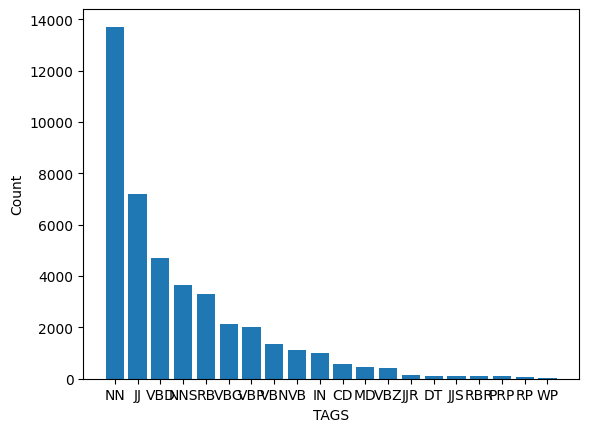

In [ ]:
dict1 = {} #postag : freq
for key, value in posTagged_text:
    if(value not in dict1):
        dict1[value] = 1
    else:
        dict1[value] += 1

sorted_tags = dict(sorted(dict1.items(), key=lambda item:item[1], reverse=True))


N = 20
sorted_tags=dict(list(sorted_tags.items())[:N])

plt.bar(sorted_tags.keys(), sorted_tags.values())
plt.xlabel('TAGS')
plt.ylabel('Count')
plt.show()

## Function to find out the largest chapter and separate all chapters

In [ ]:
def chapter_seperate(raw_text):

    #splitting the chapters from the raw text
    chapters = re.split(r'CHAPTER \w+', raw_text)


    #creating an array for chapter lengths
    chapter_lengths=[len(i) for i in chapters]

    #taking out the largest chapter text
    largest_chapter=chapters[pd.Series(chapter_lengths).idxmax()]
    return largest_chapter,chapters

In [ ]:
largest_chapter,chapters=chapter_seperate(raw_text)
largest_chapter

"\n\n   DIAGON ALLEY\n\n    H arry woke early the next morning. Although he could tell it was daylight,\nhe kept his eyes shut tight.\n        “It was a dream, he told himself firmly. “I dreamed a giant called Hagrid\ncame to tell me I was going to a school for wizards. When I open my eyes I’ll be\nat home in my cupboard.”\n        There was suddenly a loud tapping noise.\n         And there’s Aunt Petunia knocking on the door, Harry thought, his heart\nsinking. But he still didn’t open his eyes. It had been such a good dream.\n        Tap. Tap. Tap.\n        “All right,” Harry mumbled, “I’m getting up.”\n          He sat up and Hagrid’s heavy coat fell off him. The hut was full of\nsunlight, the storm was over, Hagrid himself was asleep on the collapsed sofa,\nand there was an owl rapping its claw on the window, a newspaper held in its\nbeak.\n         Harry scrambled to his feet, so happy he felt as though a large balloon\nwas swelling inside him. He went straight to the window and j

## Processing the largest chapter text

In [ ]:
largest_chapter_text=text_preprocessing(largest_chapter)
print(largest_chapter_text)

diagon alley h arry woke early the next morning although he could tell it was daylight he kept his eyes shut tight it was a dream he told himself firmly i dreamed a giant called hagrid came to tell me i was going to a school for wizards when i open my eyes ill be at home in my cupboard there was suddenly a loud tapping noise and theres aunt petunia knocking on the door harry thought his heart sinking but he still didnt open his eyes it had been such a good dream tap tap tap all right harry mumbled im getting up he sat up and hagrids heavy coat fell off him the hut was full of sunlight the storm was over hagrid himself was asleep on the collapsed sofa and there was an owl rapping its claw on the window a newspaper held in its beak harry scrambled to his feet so happy he felt as though a large balloon was swelling inside him he went straight to the window and jerked it open the owl swooped in and dropped the newspaper on top of hagrid who didnt wake up the owl then fluttered onto the flo

## Function to calculate the Bigram probabilities from  text

In [ ]:
def bigram_probability(text):

    words = text.split()
    # Counting the occurrences of bigrams
    bigrams=list(ngrams(words,2,pad_right=True))
    bigram_counts = Counter(bigrams)
    bigram_set=set(bigrams)

    # Calculating the probabilities

    #total number of unique bigrams
    total_bigrams = len(bigram_counts)
    bigram_probabilities = {bigram: count / total_bigrams for bigram, count in bigram_counts.items()}
    bigram_probabilities = dict(sorted(bigram_probabilities.items(),key=lambda item:item[1],reverse=True))

    return bigram_probabilities,bigram_set

def print_bigram_probabilities(bigram_probabilities):
    for bigram, probability in sorted(bigram_probabilities.items(),key=lambda item:item[1],reverse=True):
        print(f"Bigram: {bigram}, Probability: {probability:.6f}")



## Calculate the bigram probabilities of the largest chapter

In [ ]:
bigram_probabilities,bigram_set=bigram_probability(largest_chapter_text)
print_bigram_probabilities(bigram_probabilities)

Streaming output truncated to the last 5000 lines.
Bigram: ('left', 'alone'), Probability: 0.000377
Bigram: ('they', 'did'), Probability: 0.000377
Bigram: ('was', 'very'), Probability: 0.000377
Bigram: ('hed', 'never'), Probability: 0.000377
Bigram: ('his', 'life'), Probability: 0.000377
Bigram: ('usual', 'hagrid'), Probability: 0.000377
Bigram: ('theres', 'a'), Probability: 0.000377
Bigram: ('a', 'ministry'), Probability: 0.000377
Bigram: ('ministry', 'of'), Probability: 0.000377
Bigram: ('before', 'he'), Probability: 0.000377
Bigram: ('ever', 'there'), Probability: 0.000377
Bigram: ('was', 'one'), Probability: 0.000377
Bigram: ('so', 'he'), Probability: 0.000377
Bigram: ('what', 'does'), Probability: 0.000377
Bigram: ('magic', 'do'), Probability: 0.000377
Bigram: ('keep', 'it'), Probability: 0.000377
Bigram: ('it', 'from'), Probability: 0.000377
Bigram: ('the', 'muggles'), Probability: 0.000377
Bigram: ('down', 'the'), Probability: 0.000377
Bigram: ('blimey', 'harry'), Probability: 0

## Taking out some other random chapter

In [ ]:
random_chapter=rnd.choice(chapters)
random_chapter

"\n\n   THE FORBIDDEN FOREST\n\n    T hings couldn’t have been worse.\n        Filch took them down to Professor McGonagall’s study on the first floor,\nwhere they sat and waited without saying a word to each other. Hermione was\ntrembling. Excuses, alibis, and wild cover- up stories chased each other around\nHarry’s brain, each more feeble than the last. He couldn’t see how they were\ngoing to get out of trouble this time. They were cornered. How could they have\nbeen so stupid as to forget the cloak? There was no reason on earth that\nProfessor McGonagall would accept for their being out of bed and creeping\naround the school in the dead of night, let alone being up the tallest astronomy\ntower, which was out-of-bounds except for classes. Add Norbert and the\ninvisibility cloak, and they might as well be packing their bags already.\n        Had Harry thought that things couldn’t have been worse? He was wrong.\nWhen Professor McGonagall appeared, she was leading Neville.\n           “

## Preprocessing random chapter text

In [ ]:
random_chapter=text_preprocessing(random_chapter)
random_chapter

'the forbidden forest t hings couldnt have been worse filch took them down to professor mcgonagalls study on the first floor where they sat and waited without saying a word to each other hermione was trembling excuses alibis and wild cover up stories chased each other around harrys brain each more feeble than the last he couldnt see how they were going to get out of trouble this time they were cornered how could they have been so stupid as to forget the cloak there was no reason on earth that professor mcgonagall would accept for their being out of bed and creeping around the school in the dead of night let alone being up the tallest astronomy tower which was outofbounds except for classes add norbert and the invisibility cloak and they might as well be packing their bags already had harry thought that things couldnt have been worse he was wrong when professor mcgonagall appeared she was leading neville harry neville burst out the moment he saw the other two i was trying to find you to

## Tokenizing  random chapter text

In [ ]:
tokenized_chapter=word_tokenize(random_chapter)
tokenized_chapter

['the',
 'forbidden',
 'forest',
 't',
 'hings',
 'couldnt',
 'have',
 'been',
 'worse',
 'filch',
 'took',
 'them',
 'down',
 'to',
 'professor',
 'mcgonagalls',
 'study',
 'on',
 'the',
 'first',
 'floor',
 'where',
 'they',
 'sat',
 'and',
 'waited',
 'without',
 'saying',
 'a',
 'word',
 'to',
 'each',
 'other',
 'hermione',
 'was',
 'trembling',
 'excuses',
 'alibis',
 'and',
 'wild',
 'cover',
 'up',
 'stories',
 'chased',
 'each',
 'other',
 'around',
 'harrys',
 'brain',
 'each',
 'more',
 'feeble',
 'than',
 'the',
 'last',
 'he',
 'couldnt',
 'see',
 'how',
 'they',
 'were',
 'going',
 'to',
 'get',
 'out',
 'of',
 'trouble',
 'this',
 'time',
 'they',
 'were',
 'cornered',
 'how',
 'could',
 'they',
 'have',
 'been',
 'so',
 'stupid',
 'as',
 'to',
 'forget',
 'the',
 'cloak',
 'there',
 'was',
 'no',
 'reason',
 'on',
 'earth',
 'that',
 'professor',
 'mcgonagall',
 'would',
 'accept',
 'for',
 'their',
 'being',
 'out',
 'of',
 'bed',
 'and',
 'creeping',
 'around',
 'the'

## Function to generate a random sentence from the chapter

In [ ]:
def generate_random_sentence(tokens):

    #generating a random sentence of 8 to 10 words
    phrase_length = rnd.randint(8, 10)
    start_index = rnd.randint(0, len(tokenized_chapter) - phrase_length)
    random_sentence_words_list=tokenized_chapter[start_index:start_index+phrase_length]

    random_word_index=rnd.randint(1,len(random_sentence_words_list)-1)
    original_word=random_sentence_words_list[random_word_index]
    random_sentence_words_list[random_word_index]="______"
    consecutive_phrase = " ".join(random_sentence_words_list)

    #returning list of words in the random sentence , original word , and index of word before original word
    return random_sentence_words_list,original_word,random_word_index-1

## Writing the Shannon Game Function

In [ ]:
def play_shannon_game(tokens,bigram_set):
    sentence,original,index=generate_random_sentence(tokenized_chapter)
    print("Random Sentence from the chapter-:")
    consecutive_phrase = " ".join(sentence)
    print(consecutive_phrase,"\n")

    selected_pairs = [pair for pair in bigram_set if pair[0] == sentence[index]]
    try:
        highest_value_pair = max(selected_pairs, key=lambda pair: bigram_probabilities.get(pair, 0))
        print(f"Most probable word according to bigram probability: {highest_value_pair[1]}")
        print("Original word: ",original)
        print(".............................................\n\n")
        if highest_value_pair[1]==original:
            return True
        else:
            return False

    except ValueError as e:
        print(f"Bigram starting with ",{sentence[index]}," wasn't found in the training text.")
        print(".............................................\n\n")
        return False


In [ ]:
play_shannon_game(tokenized_chapter,bigram_set)

Random Sentence from the chapter-:
nearer home said hagrid so yeh havent noticed ______ strange 

Most probable word according to bigram probability: he
Original word:  anythin
.............................................




False

## Function to get the frequency of correctly and incorrectly identified words by the Shannon game guess

In [ ]:
def freq_guess_performance(n):
    incorrect=0
    correct=0
    for i in range(500):
        result=play_shannon_game(tokenized_chapter,bigram_set)
        if result==True:
            correct=correct+1
        else:
            incorrect=incorrect+1
    return correct,incorrect

In [ ]:
correct,incorrect=freq_guess_performance(500)


Random Sentence from the chapter-:
trailing along the ground hagrid ______ squinting up the 

Most probable word according to bigram probability: had
Original word:  was
.............................................


Random Sentence from the chapter-:
learn ______ and spells by heart memorize the 

Most probable word according to bigram probability: magic
Original word:  charms
.............................................


Random Sentence from the chapter-:
said malfoy quickly looking at ______ long teeth 

Most probable word according to bigram probability: hogwarts
Original word:  fangs
.............................................


Random Sentence from the chapter-:
i want ter ______ started harrys heart rose 

Most probable word according to bigram probability: get
Original word:  get
.............................................


Random Sentence from the chapter-:
two to pass ______ he looked up the figure had 

Bigram starting with  {'pass'}  wasn't found in the training tex

## Writing a function and visualising the Shannon game guesses on a Pie Chart

In [ ]:
def visualise_the_guesses(correct,incorrect):
    y=[correct,incorrect]
    total=correct+incorrect
    accuracy=(float(correct)/total)

    mylabels=[f"Correctly Identified {accuracy*100:.2f}%",f"Incorrectly Identified {(1-accuracy)*100:.2f}%"]
    myexplode=[0,0.2]
    mycolors = ["red", "blue"]
    plt.pie(y,labels=mylabels,explode=myexplode,colors=mycolors)
    plt.show()

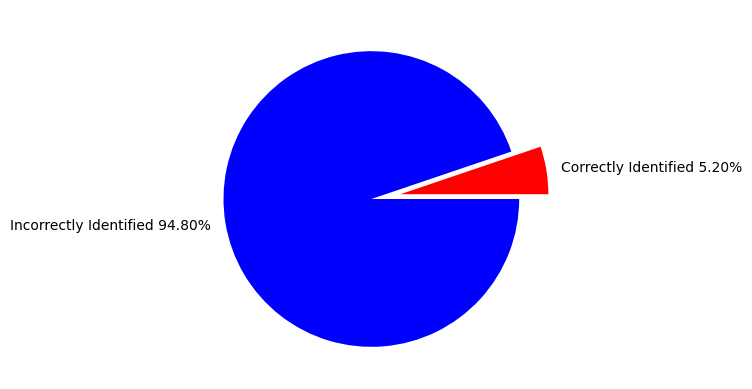

In [ ]:
visualise_the_guesses(correct,incorrect)